# ANOVA (Analysis of Variance)

A statistical procedure used to compare two *or more* group means. "Type" of ANOVA depends on the number of factors (one-way or two-way) and how the participants were observed (between-subjects or repeated-measures).<br/> <img align=right src="http://www.statisticshowto.com/wp-content/uploads/2014/12/F_pdf.svg_.png" width="250"><img align=right src="http://www.statisticshowto.com/wp-content/uploads/2013/09/f-table-300x166.jpg" width="300">
   -- Dependent Variable: Continuous<br/>
   -- Independent Variable: Categorical
 
<u>Hypothesis testing</u>: Significance level $p<0.05$<br/> 
Null Hypothesis ($H_0$): $\mu_1 = \mu_2 = ... = \mu_k$ <br/>
Alternate Hypothesis ($H_1$): Not $\mu_1 = \mu_2 = ... = \mu_k$ <br/>
*Note: Reject $H_0$ when $p<0.05$ and retain $H_0$ when $p<0.05$*

$F=\frac{\text {mean squares between groups}}{\text {mean squares within groups}}=\frac{MS_{between}}{MS_{within}}=\frac{SS_{between}/df_{between}}{SS_{within}/df_{within}}$ <br/> 

Example: 3 groups with N=53 students ($df_{between}=k-1$ and $df_{within}=N-k$)<br/>
  - $F_{crit}(.05, 2, 50)=3.18$
<img align=center src="https://image.slidesharecdn.com/ftable-110922032944-phpapp02/95/ftable-4-728.jpg?cb=1316662217" width="800"> 





## Dataset-The Effect of Vitamin C on Tooth Growth in Guinea Pigs
The response is the length of odontoblasts (cells responsible for tooth growth) in 60 guinea pigs. Each animal received one of three dose levels of vitamin C (0.5, 1, and 2 mg/day) by one of two delivery methods, (orange juice or ascorbic acid (a form of vitamin C and coded as VC).

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sm.datasets.get_rdataset("ToothGrowth", "datasets").data
df['dose'].replace(0.5, 'D0.5',inplace=True)
df['dose'].replace(1.0, 'D1',inplace=True)
df['dose'].replace(2.0, 'D2',inplace=True)


print(df.head(),'\n')
print('Supp Groups:',df.groupby(['supp']).groups.keys())
print('Dose Groups:',df.groupby(['dose']).groups.keys())
print('\nN=',len(df))

    len supp  dose
0   4.2   VC  D0.5
1  11.5   VC  D0.5
2   7.3   VC  D0.5
3   5.8   VC  D0.5
4   6.4   VC  D0.5 

Supp Groups: dict_keys(['VC', 'OJ'])
Dose Groups: dict_keys(['D1', 'D2', 'D0.5'])

N= 60


## Assumptions of ANOVA
1. Independence: dealt with (or should be dealth with) when designing your study
2. Normality of data: the scores on the dependent variable are normally distributed in the population (Shapiro-Wilks test)
3. Homogeneity of variance: the population variances in all levels of factors are equal (Levene’s test of Homogeneity)

### Normality of data
1. Visualize: Histogram or Boxplot (QQ-plot--after defining the model)
2. [Shapiro-Wilk test for normality](http://www.statisticshowto.com/shapiro-wilk-test/): the data was drawn from a normal distribution

C:\Users\Rachel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Shapiro Wilks test: (0.9674286842346191, 0.10910055041313171)


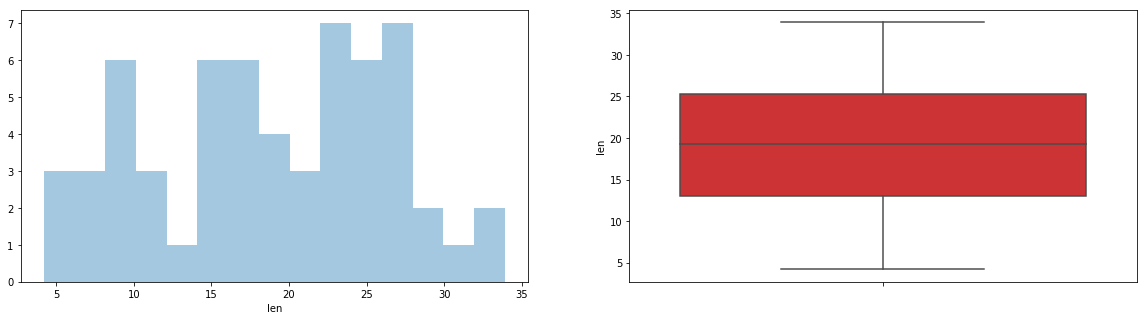

In [3]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.distplot(df['len'], bins=15, kde=False, ax=axs[0])
sns.boxplot(y="len", data=df, palette="Set1", ax=axs[1])

print('Shapiro Wilks test:', stats.shapiro(df['len']))

### Homogeneity of variance
1. [Levene's test for equal variances](http://www.statisticshowto.com/levene-test/)<br/>
  
2. [Bartlett’s test for homogeneity of variances](http://www.statisticshowto.com/bartletts-test/)

In [4]:
vc = df[df['supp'] == 'VC']['len']
oj = df[df['supp'] == 'OJ']['len']

a = df[df['dose'] == 'D0.5']['len']
b = df[df['dose'] == 'D1']['len']
c = df[df['dose'] == "D2"]['len']

print('Supp')
print('Levene`s test:',stats.levene(vc,oj))
print('Bartlett`s test:', stats.bartlett(vc,oj))

print('\nDose')
print('Levene`s test:', stats.levene(a, b, c))
print('Bartlett`s test:', stats.bartlett(a,b,c))

Supp
Levene`s test: LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)
Bartlett`s test: BartlettResult(statistic=1.421682114943345, pvalue=0.23312673355220734)

Dose
Levene`s test: LeveneResult(statistic=0.6457341109631506, pvalue=0.5280694573759905)
Bartlett`s test: BartlettResult(statistic=0.6654670663030519, pvalue=0.71696121509966)


## One Way Between-Subjects ANOVA

RQ: "Is there a difference in mean tooth length by supplement type?" or "Is there a difference in mean tooth length by
dosage level?"

One *factor* with different participants at $k$ levels

 - Example: "Dose" is one factor with 3 levels

In [5]:
supp = df.groupby('supp')
print(round(supp['len'].describe(),2),'\n')

dose = df.groupby('dose')
print(round(dose['len'].describe(),2),'\n')

      count   mean   std  min    25%   50%    75%   max
supp                                                   
OJ     30.0  20.66  6.61  8.2  15.52  22.7  25.72  30.9
VC     30.0  16.96  8.27  4.2  11.20  16.5  23.10  33.9 

      count   mean   std   min    25%    50%    75%   max
dose                                                     
D0.5   20.0  10.60  4.50   4.2   7.22   9.85  12.25  21.5
D1     20.0  19.74  4.42  13.6  16.25  19.25  23.38  27.3
D2     20.0  26.10  3.77  18.5  23.52  25.95  27.83  33.9 



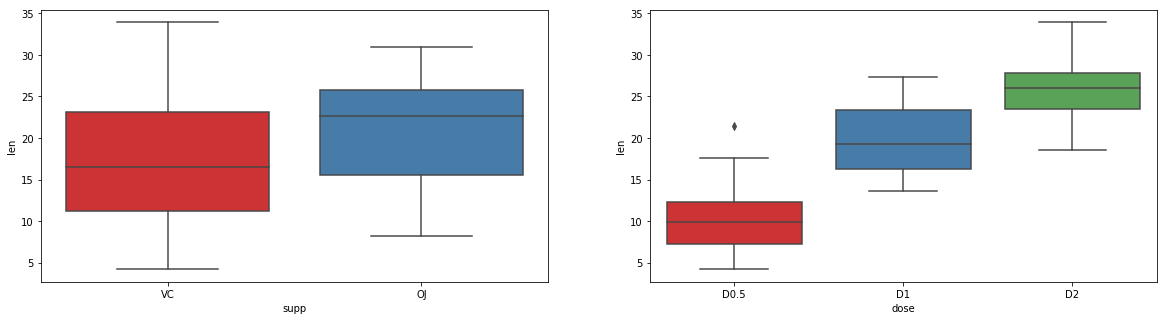

In [6]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.boxplot(x="supp", y="len", data=df, palette="Set1",ax=axs[0])
sns.boxplot(x="dose", y="len", data=df, palette="Set1",ax=axs[1])

In [7]:
print('Supp t-test:', stats.ttest_ind(vc, oj))
print('Supp ANOVA:', stats.f_oneway(vc, oj),'\n')


print('Rank ANOVA:', stats.f_oneway(a, b, c),'\n')

Supp t-test: Ttest_indResult(statistic=-1.91526826869527, pvalue=0.06039337122412849)
Supp ANOVA: F_onewayResult(statistic=3.6682525410709697, pvalue=0.060393371224128745) 

Rank ANOVA: F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16) 



In [8]:
from statsmodels.formula.api import ols

mod = ols('len ~ supp',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table,'\n')

mod = ols('len ~ dose',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table,'\n')

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print(esq_sm, '\n')

            df       sum_sq     mean_sq         F    PR(>F)
supp       1.0   205.350000  205.350000  3.668253  0.060393
Residual  58.0  3246.859333   55.980333       NaN       NaN 

            df       sum_sq      mean_sq          F        PR(>F)
dose       2.0  2426.434333  1213.217167  67.415738  9.532727e-16
Residual  57.0  1025.775000    17.996053        NaN           NaN 

0.7028641947939037 



In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['len'], df['dose'])
result = mc.tukeyhsd()
 
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 D0.5    D1     9.13    5.9018 12.3582  True 
 D0.5    D2    15.495  12.2668 18.7232  True 
  D1     D2    6.365    3.1368  9.5932  True 
---------------------------------------------


## Two-Way Between Subjects ANOVA 

RQ: "Is there a difference in mean tooth length for differing supplement type and dosage levels?"

Two *factors* with different participants at $k$ levels

*Note: Two-Way ANOVA has main effects and an interaction effect (differences between the differences).*

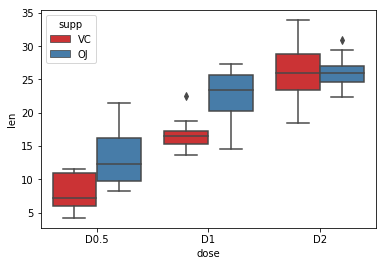

In [10]:
sns.boxplot(x="dose", y="len", hue="supp", data=df, palette="Set1")

In [11]:
from statsmodels.stats.anova import anova_lm
formula = 'len ~ C(supp)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=1)
print(aov_table,'\n')

formula = 'len ~ C(supp) + C(dose)'
model = ols(formula, df).fit()
aov_table = round(anova_lm(model, typ=1),5)
print(aov_table,'\n')


formula = 'len ~ C(supp) + C(dose)+ C(supp):C(dose)'
model = ols(formula, df).fit()
aov_table = round(anova_lm(model, typ=1),5)
print(aov_table,'\n')

            df       sum_sq     mean_sq         F    PR(>F)
C(supp)    1.0   205.350000  205.350000  3.668253  0.060393
Residual  58.0  3246.859333   55.980333       NaN       NaN 

            df      sum_sq     mean_sq         F   PR(>F)
C(supp)    1.0   205.35000   205.35000  14.01664  0.00043
C(dose)    2.0  2426.43433  1213.21717  82.81093  0.00000
Residual  56.0   820.42500    14.65045       NaN      NaN 

                   df      sum_sq     mean_sq         F   PR(>F)
C(supp)           1.0   205.35000   205.35000  15.57198  0.00023
C(dose)           2.0  2426.43433  1213.21717  91.99996  0.00000
C(supp):C(dose)   2.0   108.31900    54.15950   4.10699  0.02186
Residual         54.0   712.10600    13.18715       NaN      NaN 



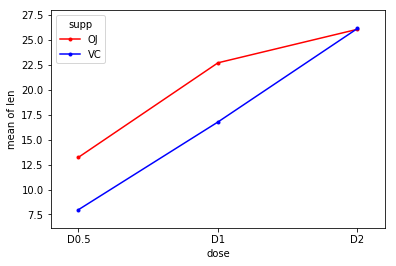

In [12]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df['dose'], df['supp'], df['len'], colors=['red','blue'])

## Within-Subjects Design (a.k.a Repeated Measures ANOVA)
One (or two) factor(s) with the <u>same</u> participants at each level of the factor(s)

## Dataset-Weight Loss Data
Contrived data on weight loss and self esteem over three months, for three groups of individuals:
Control, Diet and Diet + Exercise.

In [1]:
require(carData)
data<-WeightLoss

data$NormID<-1:nrow(data)
nrow(data)
print(data[1:15,])
data$group<-as.factor(data$group)
print(levels(data$group))

Loading required package: carData


[1] 34

     group wl1 wl2 wl3 se1 se2 se3 NormID
1  Control   4   3   3  14  13  15      1
2  Control   4   4   3  13  14  17      2
3  Control   4   3   1  17  12  16      3
4  Control   3   2   1  11  11  12      4
5  Control   5   3   2  16  15  14      5
6  Control   6   5   4  17  18  18      6
7  Control   6   5   4  17  16  19      7
8  Control   5   4   1  13  15  15      8
9  Control   5   4   1  14  14  15      9
10 Control   3   3   2  14  15  13     10
11 Control   4   2   2  16  16  11     11
12 Control   5   2   1  15  13  16     12
13    Diet   6   3   2  12  11  14     13
14    Diet   5   4   1  13  14  15     14
15    Diet   7   6   3  17  11  18     15
[1] "Control" "Diet"    "DietEx" 


In [3]:
subj<-c()
group<-c()
week<-c()
weight.loss<-c()
self.esteem<-c()

wl<-c("wl1", "wl2", "wl3")
se<-c("se1", "se2", "se3")

for(i in 1:nrow(data)){
  for(j in 1:length(se)){
    subj<-c(subj, data$NormID[i])
    group<-c(group, data$group[i])
    week<-c(week, wl[j])
    weight.loss<-c(weight.loss, data[i, wl[j]])
    self.esteem<-c(self.esteem, data[i, se[j]])
  }
}

df<-data.frame(subj, group, week, weight.loss, self.esteem)
nrow(df)
print(df[1:15,])

[1] 102

   subj group week weight.loss self.esteem
1     1     1  wl1           4          14
2     1     1  wl2           3          13
3     1     1  wl3           3          15
4     2     1  wl1           4          13
5     2     1  wl2           4          14
6     2     1  wl3           3          17
7     3     1  wl1           4          17
8     3     1  wl2           3          12
9     3     1  wl3           1          16
10    4     1  wl1           3          11
11    4     1  wl2           2          11
12    4     1  wl3           1          12
13    5     1  wl1           5          16
14    5     1  wl2           3          15
15    5     1  wl3           2          14


### One-Way Within-Subjects ANOVA 

In [4]:
cat("Weight Loss")
fit <- aov(weight.loss ~ week+Error(subj/week), data=df)
print(summary(fit))

cat("\nSelf-Esteem")
fit <- aov(self.esteem ~ week+Error(subj/week), data=df)
print(summary(fit))

Weight Loss
Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  35.82   35.82               

Error: subj:week
     Df Sum Sq Mean Sq
week  2  174.6   87.31

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)  
week       2   15.8   7.898   4.179 0.0182 *
Residuals 96  181.4   1.890                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Self-Esteem
Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1  17.04   17.04               

Error: subj:week
     Df Sum Sq Mean Sq
week  2  111.5   55.77

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
week       2    1.7   0.832   0.189  0.828
Residuals 96  421.7   4.393               


### Two-Way Within-Subjects ANOVA 

In [5]:
cat("Weight Loss")
fit <- aov(weight.loss ~ week*group+Error(subj/(week)), data=df)
print(summary(fit))

cat("\nSelf-Esteem")
fit <- aov(self.esteem ~ week*group+Error(subj/(week)), data=df)
print(summary(fit))

Weight Loss
Error: subj
      Df Sum Sq Mean Sq
group  1  35.82   35.82

Error: subj:week
     Df Sum Sq Mean Sq
week  2  174.6   87.31

Error: Within
           Df Sum Sq Mean Sq F value Pr(>F)  
week        2  15.80   7.898   4.198  0.018 *
group       1   2.13   2.135   1.135  0.290  
week:group  2   4.31   2.156   1.146  0.322  
Residuals  93 174.97   1.881                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Self-Esteem
Error: subj
      Df Sum Sq Mean Sq
group  1  17.04   17.04

Error: subj:week
     Df Sum Sq Mean Sq
week  2  111.5   55.77

Error: Within
           Df Sum Sq Mean Sq F value Pr(>F)  
week        2    1.7   0.832   0.210 0.8112  
group       1   15.2  15.157   3.821 0.0536 .
week:group  2   37.7  18.842   4.750 0.0109 *
Residuals  93  368.9   3.967                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
